<a href="https://colab.research.google.com/github/jcmachicaocuf/CUF__NLP_LLM/blob/main/nlp__textos_redes_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Diagramación de Redes Semánticas Complejas

In [ ]:
#@title Librerías
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
#import meaningcloud as mcd
import pandas as pd
import time
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#@title Generación de data (manual)
data_2 = pd.DataFrame(
  [
    ['Toma de Decisiones', 'Grupo 1'],
    ['Información', 'Grupo 2'],
    ['Percepción', 'Grupo 1'],
    ['Inteligencia', 'Grupo 1'],
    ['Función', 'Grupo 2'],
    ['Inteligencia', 'Grupo 3'],
    ['Información', 'Grupo 3'],
    ['Toma de Decisiones', 'Grupo 3'],
    ['Función', 'Grupo 1'],
    ['Percepción', 'Grupo 2'],
    ['Pandemia', 'Grupo 2'],
    ['Pandemia', 'Grupo 3'],
    ['Pandemia', 'Grupo 1']
  ]
)
data_2.columns = ['palabra', 'grupo']

In [ ]:
#@title Generación de data (externa)
ruta = '/content/drive/My Drive/2020 Proyectos/2020 Iniciativas con Claudia Avila/'
data_2 = pd.read_excel('prueba_texto.xlsx')
data_2

,texto
0,The training of engineering professionals is i...


In [ ]:
data_2.texto[0]

'The training of engineering professionals is in a process of transformation and improvement to respond to the new demands that the present century demands. Given this, the requirements of international institutions such as UNESCO and international accreditors in Engineering programs such as ABET emphasize the importance of "soft" skills such as awareness for lifelong learning. In addition to technical knowledge, engineers have to experiment and become aware of the importance and impact of lifelong learning, and it is part of our job to equip them with tools. The Universidad Nacional de San Agustín de Arequipa responds to these challenges in its new educational model implemented since 2017. During 2020, in the context of distance learning, new strategies have been incorporated in search of this objective. The authors show their experience in strengthening this important competence by making use of the development of Personal Learning Environments for Industrial Engineering students in 

In [ ]:
ruta_archivo = 'drive/My Drive/2020 Proyectos/data lab prueba/libro_conclusiones.xlsx'

In [ ]:
texto_conclu = pd.read_excel(ruta_archivo)
texto_conclu

,id_tx,texto
0,0,. Conclusiones sobre la deserción estudiantil ...
1,1,. Conclusiones y trabajo futuroEl uso de dispo...
2,2,. Conclusiones y trabajo futuroTeniendo en cue...
3,3,". Conclusiones En los días actuales, para la c..."


In [ ]:
tx0 = ''
for tx in texto_conclu.texto:
  tx0 += tx
print(len(tx0))
texto_fuente = tx0

9853


In [ ]:
texto_fuente = data_2.texto[0]
#@title Generación de pares de párrafo
tamanho_pal = 5
pares = []
tx_tokens = word_tokenize(texto_fuente)
for j, tx in enumerate(tx_tokens[1:]):
  if len(tx_tokens[j-1])>tamanho_pal and len(tx_tokens[j])>tamanho_pal:
    pares.append([tx_tokens[j-1].lower(), tx_tokens[j].lower()])
pares_df = pd.DataFrame(pares)
pares_df.columns = ['col_a', 'col_b']
pares_df.head()

,col_a,col_b
0,engineering,professionals
1,present,century
2,century,demands
3,international,institutions
4,international,accreditors


In [ ]:
G_2 = nx.from_pandas_edgelist(pares_df, 'col_a', 'col_b')

In [ ]:
#Parámetros
my_alpha = 0.7
iteraciones = 200
escala = 1e6
ancho, alto = 20, 20

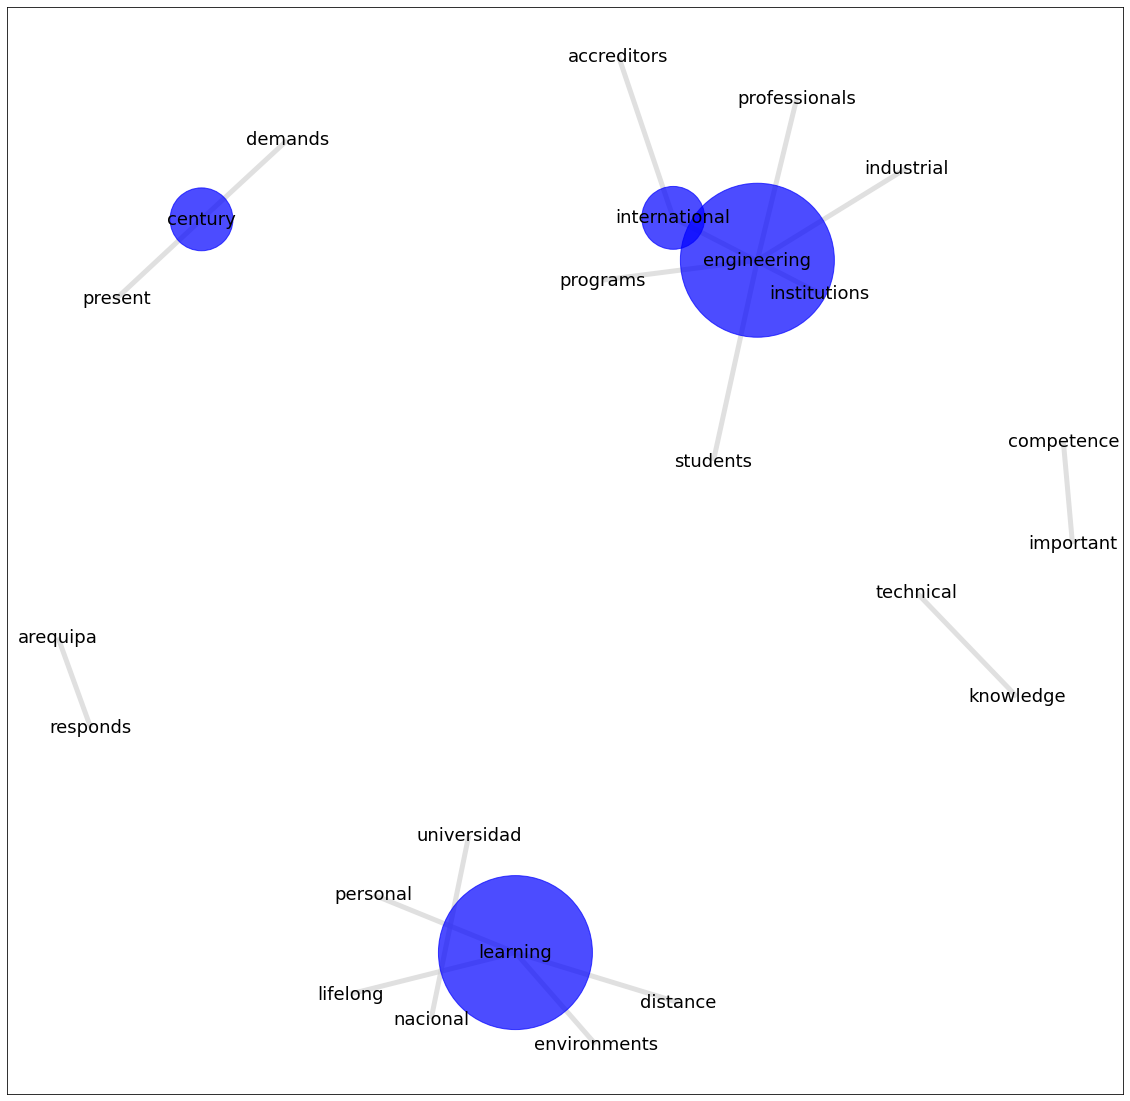

In [ ]:
#@title Grafica Red

pos_2 = nx.spring_layout(G_2, k=2.0, iterations=iteraciones)
d_2 = nx.betweenness_centrality(G_2)
labs = list(d_2.keys())
sizes = [v*escala for v in list(d_2.values())]

# Generación de etiquetas de nodos
labels = {}
for node in G_2.nodes():
  labels[node] = node

# Gráfica
plt.figure(figsize=(ancho,alto))
nx.draw_networkx_nodes(G_2, pos_2, nodelist=labs,
                       node_color='b', node_size=sizes, alpha=my_alpha)
#nx.draw_networkx_nodes(G_2, pos_2, nodelist=list(data_2.grupo),
#                       node_color='r', node_size=node_sz, alpha=my_alpha)
nx.draw_networkx_edges(G_2, pos_2, edge_color='lightgray', width=5.0, alpha=my_alpha)
nx.draw_networkx_labels(G_2,pos_2,labels,font_size=18)
plt.savefig('drive/My Drive/2020 Proyectos/data lab prueba/libro.jpg')
#plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
d_df = pd.DataFrame.from_dict(d_2, orient='index')
d_df.sort_values(by=[0], ascending=False).head(20)

,0
fueron,0.000716
nacional,0.000716
infectados,0.000716
minera,0.000596
regional,0.000596
avelino,0.000477
personal,0.000477
cerrados,0.000477
permanecen,0.000477
oficina,0.000358
